<a href="https://colab.research.google.com/github/anita03012005/weatherwise-jiasyuan/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [14]:
# 🌦️ Setup and Imports for WeatherWise (using wttr.in API)

# Import required libraries
import requests
import matplotlib.pyplot as plt
import pandas as pd

## 📦 Setup and Configuration
Import required packages and setup environment.

In [13]:
import os

# Skip AI setup for now — not needed for weather data
os.environ['HANDS_ON_AI_SERVER'] = ''
os.environ['HANDS_ON_AI_MODEL'] = ''
os.environ['HANDS_ON_AI_API_KEY'] = ''

## 🌤️ Weather Data Functions

In [ ]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of days to forecast (1-5)

    Returns:
        dict: Weather data including current conditions and forecast
    """
    pass

In [3]:
def get_weather_data(location, forecast_days=5, timeout=10):
    import requests
    if not location or not isinstance(location, str):
        print("Error: Invalid location")
        return None

    if not 1 <= forecast_days <= 5:
        print("Error: forecast_days must be between 1 and 5")
        forecast_days = min(max(1, forecast_days), 5)

    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()

        data = response.json()
        result = {
                "location": location.replace("+", " "),
                "current": {
                    "temperature": {
                        "current": int(data["current_condition"][0]["temp_C"]),
                        "feels_like": int(data["current_condition"][0]["FeelsLikeC"])
                    },
                    "condition": data["current_condition"][0]["weatherDesc"][0]["value"],
                    "humidity": int(data["current_condition"][0]["humidity"]),
                    "wind": {
                        "speed": int(data["current_condition"][0]["windspeedKmph"]),
                        "direction": data["current_condition"][0]["winddir16Point"]
                    },
                    "precipitation": float(data["current_condition"][0]["precipMM"])
                },
                "forecast": []
        }

        for i in range(min(forecast_days, len(data["weather"]))):
            day = data["weather"][i]
            forecast_day = {
                    "date": day["date"],
                    "max_temp": int(day["maxtempC"]),
                    "min_temp": int(day["mintempC"]),
                    "condition": day["hourly"][4]["weatherDesc"][0]["value"],  # Midday condition
                    "precipitation": {
                        "chance": int(day["hourly"][4]["chanceofrain"]),
                        "amount": float(day["hourly"][4]["precipMM"])
                    },
                    "wind": {
                        "speed": int(day["hourly"][4]["windspeedKmph"]),
                        "direction": day["hourly"][4]["winddir16Point"]
                    }
                }
            result["forecast"].append(forecast_day)

        return result
    except requests.exceptions.RequestException as e:
        print(f"Error retrieving weather data: {e}")
        return None
    except (KeyError, ValueError, TypeError) as e:
        print(f"Error processing weather data: {e}")
        return Non

# Ask user to input ramdom city
city = input("🌏Enter a city name:")
while True:
    days = int(input("📅 How many forecast days? (1–5): "))
    if 1 <= days <=5:
        break
    else:
        print("⚠️Please enter a number between 1 and 5")

data = get_weather_data(city,days)
if data:
    print(f"📍 Location: {data['location']}")
    print(f"🌡️ Temperature: {data['current']['temperature']['current']}°C (Feels like {data['current']['temperature']['feels_like']}°C)")
    print(f"☁️ Condition: {data['current']['condition']}")
    print(f"💧 Humidity: {data['current']['humidity']}%")
    print(f"💨 Wind: {data['current']['wind']['speed']} km/h {data['current']['wind']['direction']}")
else:
    print("❌ Failed to retrieve weather data.")

🌏Enter a city name:perth 
📅 How many forecast days? (1–5): 3
📍 Location: perth 
🌡️ Temperature: 17°C (Feels like 17°C)
☁️ Condition: Clear
💧 Humidity: 63%
💨 Wind: 19 km/h S


## 📊 Visualisation Functions

In [ ]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

Enter a city:sydney
Location: sydney
Now: Overcast, 21°C (feels 21°C)


,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-21,21,18,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 17, 'direction': 'ESE'}"
1,2025-10-22,37,18,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 33, 'direction': 'NNW'}"
2,2025-10-23,19,16,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 21, 'direction': 'SE'}"


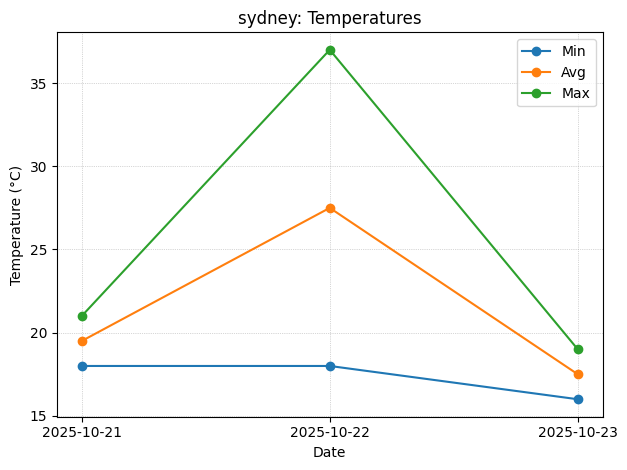

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def forecast_to_df(weather_data):
    """
    Convert forecast data from dictionary to pandas DataFrame.

    Args:
        weather_data (dict): Weather data including forecast

    Returns:
        pd.DataFrame: DataFrame containing forecast data
    """
    if weather_data and "forecast" in weather_data:
        return pd.DataFrame(weather_data["forecast"])
    return pd.DataFrame()

def create_temperature_visualisation(weather_data:dict,output_type:str = 'display'):
    # create a Dateframe from the weather_data
    df = forecast_to_df(weather_data)
    if df.empty:
        print("No forecast data to plot.")
        return None

    # create the figure for plotting
    fig = plt.figure()
    x = df["date"].astype(str)
    df["avg_temp"] = (df["min_temp"] + df["max_temp"]) / 2

    # plot minimum and maximum temperature line chart
    plt.plot(x, df["min_temp"], marker="o", label="Min")
    plt.plot(x, df["avg_temp"], marker="o", label="Avg")
    plt.plot(x, df["max_temp"], marker="o", label="Max")

    # customize chart label,title and layout
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title(f"{weather_data.get('location', 'Location')}: Temperatures")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.5)
    plt.tight_layout()

    if output_type == "figure":
        return fig
    plt.show()
    return None

# Ask user to input a city
city = input ("Enter a city:").strip()

try:
    data = get_weather_data(city, forecast_days=5)
    if not data:
        print("Failed to fetch data. Try another city.")
    else:
        print(f"Location: {data['location']}")
        cur = data["current"]
        print(f"Now: {cur['condition']}, {cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
        df = forecast_to_df(data)
        display(df)  # shows tidy table
        # optional quick charts:
        create_temperature_visualisation(data)

except Exception as e:
    print("Error:", e)



In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

Enter a city:Londo 
Location: Londo
Now: Patchy rain nearby, 28°C (feels 30°C)


,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-21,28,20,Patchy rain nearby,"{'chance': 100, 'amount': 0.1}","{'speed': 5, 'direction': 'WSW'}"
1,2025-10-22,34,20,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 1, 'direction': 'NW'}"
2,2025-10-23,34,21,Partly Cloudy,"{'chance': 0, 'amount': 0.0}","{'speed': 6, 'direction': 'NW'}"


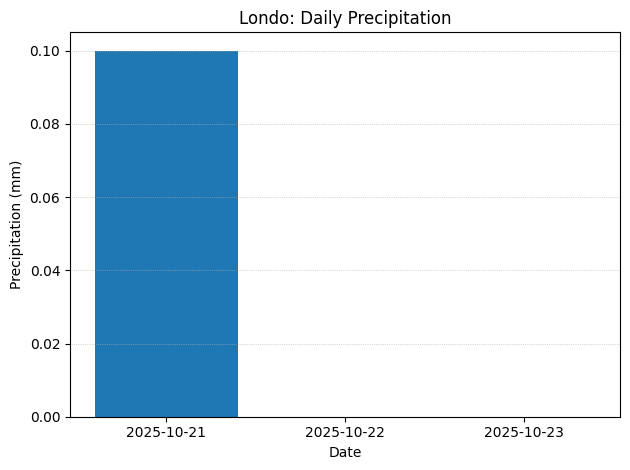

In [11]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

def create_precipitation_visualisation(weather_data: dict, output_type: str = 'display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """

    # create a Dateframe from the weather_data
    df = forecast_to_df(weather_data)
    if df.empty:
        print("No forecast data to plot.")
        return None

    # identify precipitation column
    if 'precip_mm' in df.columns:
        y = pd.to_numeric(df['precip_mm'], errors='coerce').fillna(0.0)
    elif 'precipitation' in df.columns:
        y = df['precipitation'].apply(
            lambda d: float(d.get('amount', 0)) if isinstance(d, dict) else 0.0
        )
    else:
        print("No precipitation column found in DataFrame.")
        return None

    x = df['date'].astype(str)

    # plot the precipitation figure
    fig = plt.figure()
    plt.bar(x, y)
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.title(f"{weather_data.get('location','Location')}: Daily Precipitation")
    plt.grid(True, axis='y', linestyle=':', linewidth=0.5)
    plt.tight_layout()

    # display the figure
    if output_type == 'figure':
        return fig
    plt.show()
    return None

# Ask user to input a city
city = input ("Enter a city:").strip()

try:
    data = get_weather_data(city, forecast_days=5)
    if not data:
        print("Failed to fetch data. Try another city.")
    else:
        print(f"Location: {data['location']}")
        cur = data["current"]
        print(f"Now: {cur['condition']}, {cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
        df = forecast_to_df(data)
        display(df)  # shows tidy table
        # optional quick charts:
        create_precipitation_visualisation(data)

except Exception as e:
    print("Error:", e)



In [ ]:
import pandas as pd

def forecast_to_df(weather_data):
    """
    Convert forecast data from dictionary to pandas DataFrame.

    Args:
        weather_data (dict): Weather data including forecast

    Returns:
        pd.DataFrame: DataFrame containing forecast data
    """
    if weather_data and "forecast" in weather_data:
        return pd.DataFrame(weather_data["forecast"])
    return pd.DataFrame()

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

In [15]:
import re
from typing import Any, Dict

_WEATHER_ATTRS = {
    'temp': ['temperature','temp','hot','cold','warm','cool','°c','degree'],
    'rain': ['rain','precip','precipitation','umbrella','shower','wet'],
    'wind': ['wind','breeze','gust'],
    'humidity': ['humidity','humid']
}
_TIME_WORDS = {
    'today': ['today','tonight'],
    'tomorrow': ['tomorrow','tmr'],
    'week': ['this week','next 5 days','next week','coming days']
}
_LOCATION_RE = re.compile(r"(?:in|for|at)\s+([A-Za-z\s\-]+)$", re.I)

def parse_weather_question(question: str) -> Dict[str, Any]:
    """
    Extract {location, time, attribute} from a plain-English question.
    """
    q = (question or "").strip()
    out = {"location": None, "time": "week", "attribute": None}

    m = _LOCATION_RE.search(q)
    if m:
        out["location"] = m.group(1).strip()
    else:
        # fall back: last Title-cased token looks like a place
        tokens = [t for t in re.split(r"\s+", q) if t.istitle()]
        if tokens:
            out["location"] = tokens[-1]

    for key, words in _TIME_WORDS.items():
        if any(w in q.lower() for w in words):
            out["time"] = key
            break

    for key, words in _WEATHER_ATTRS.items():
        if any(w in q.lower() for w in words):
            out["attribute"] = key
            break

    return out

In [16]:
import pandas as pd

def _select_period(df: pd.DataFrame, time: str):
    if df.empty:
        return df
    if time == "today":
        return df.iloc[:1]
    if time == "tomorrow":
        return df.iloc[1:2] if len(df) > 1 else df.iloc[-1:]
    return df  # default = week

def generate_weather_response(parsed_question: dict, weather_data: dict) -> str:
    """
    Build a friendly summary based on parsed intent + your forecast table.
    """
    df = forecast_to_df(weather_data)
    if df.empty:
        return "Sorry, I couldn't find forecast data."

    loc = parsed_question.get("location") or weather_data.get("location","your location")
    period = _select_period(df, parsed_question.get("time","week"))
    attr = parsed_question.get("attribute")

    pieces = []

    # Temperature summary (default if no specific attribute)
    if attr in (None, "temp"):
        tmin = float(period["min_temp_c"].min()) if "min_temp_c" in period else None
        tmax = float(period["max_temp_c"].max()) if "max_temp_c" in period else None
        if tmin is not None and tmax is not None:
            pieces.append(f"In {loc}, temperatures range from {tmin:.0f}°C to {tmax:.0f}°C.")

    # Rain
    if attr in (None, "rain") and "precip_mm" in period:
        rain_total = float(period["precip_mm"].sum())
        if rain_total > 0:
            pieces.append(f"Total precipitation about {rain_total:.1f} mm.")
        else:
            pieces.append("Little to no rain expected.")

    # Wind
    if attr in (None, "wind") and "wind_kmph" in period:
        pieces.append(f"Winds up to around {int(period['wind_kmph'].max())} km/h.")

    # A couple of daily lines
    lines = []
    for _, r in period.head(3).iterrows():
        seg = f"{r['date']}: {r.get('min_temp_c',0):.0f}–{r.get('max_temp_c',0):.0f}°C"
        if "precip_mm" in r: seg += f", rain {float(r['precip_mm']):.1f} mm"
        if "wind_kmph" in r: seg += f", wind {int(r['wind_kmph'])} km/h"
        lines.append(seg)
    if lines:
        pieces.append(" " + " ".join(lines))

    return " ".join(pieces)

## 🧭 User Interface

In [24]:
!install 'pyinputplus'
import pyinputplus as pyip
from pprint import pprint

def run_console_ui():
    """
    Simple console menu that calls core functions (no duplicated logic).
    """
    current_city = "Perth"
    forecast_days = 5
    data = None

    while True:
        choice = pyip.inputMenu(
            [
                "Change city",
                "Fetch data",
                "Show current + table",
                "Temperature chart",
                "Precipitation chart",
                "Ask a weather question",
                "Quit"
            ],
            numbered=True, prompt="\nWeatherWise Menu\n"
        )

        if choice == "Change city":
            current_city = pyip.inputStr("Enter city: ").strip() or current_city
            forecast_days = pyip.inputInt("Days (1-5): ", min=1, max=5)

        elif choice == "Fetch data":
            data = get_weather_data(current_city, forecast_days)
            if data:
                print(f"Fetched {len(data.get('forecast',[]))} day(s) for {data['location']}")
            else:
                print("Failed to fetch. Try another city.")

        elif choice == "Show current + table":
            if not data:
                print("Fetch data first.")
                continue
            cur = data["current"]
            print(f"Now in {data['location']}: {cur['condition']}, "
                  f"{cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
            display(forecast_to_df(data))

        elif choice == "Temperature chart":
            if not data: print("Fetch data first."); continue
            create_temperature_visualisation(data)

        elif choice == "Precipitation chart":
            if not data: print("Fetch data first."); continue
            create_precipitation_visualisation(data)

        elif choice == "Ask a weather question":
            if not data: print("Fetch data first."); continue
            q = pyip.inputStr("Your question: ")
            parsed = parse_weather_question(q)
            # if user didn't state a city, default to current
            if not parsed.get("location"):
                parsed["location"] = data["location"]
            ans = generate_weather_response(parsed, data)
            print("\n", ans, "\n")

        elif choice == "Quit":
            print("Goodbye!")
            break

install: missing destination file operand after 'pyinputplus'
Try 'install --help' for more information.


ModuleNotFoundError: No module named 'pyinputplus'

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass
    pass


In [25]:
def main(mode="console"):
    if mode == "console":
        run_console_ui()
    else:
        # you can also have run_widgets_ui() if you built the widget UI
        run_console_ui()

## 🧪 Testing and Examples

,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-22,9,5,Light rain,"{'chance': 100, 'amount': 2.0}","{'speed': 1, 'direction': 'NW'}"
1,2025-10-23,14,2,Patchy rain nearby,"{'chance': 89, 'amount': 0.0}","{'speed': 20, 'direction': 'W'}"
2,2025-10-24,15,4,Partly Cloudy,"{'chance': 0, 'amount': 0.0}","{'speed': 20, 'direction': 'W'}"


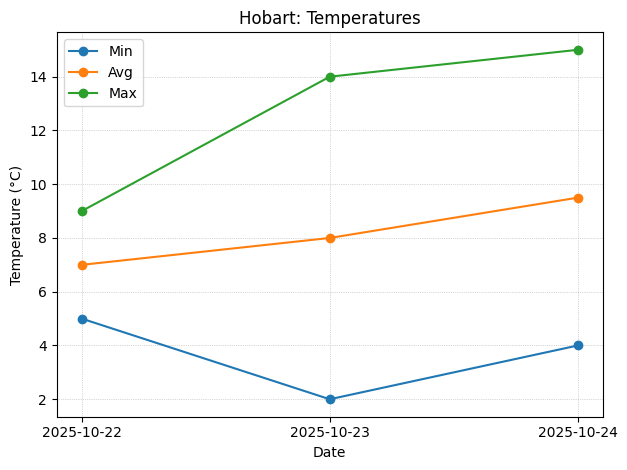

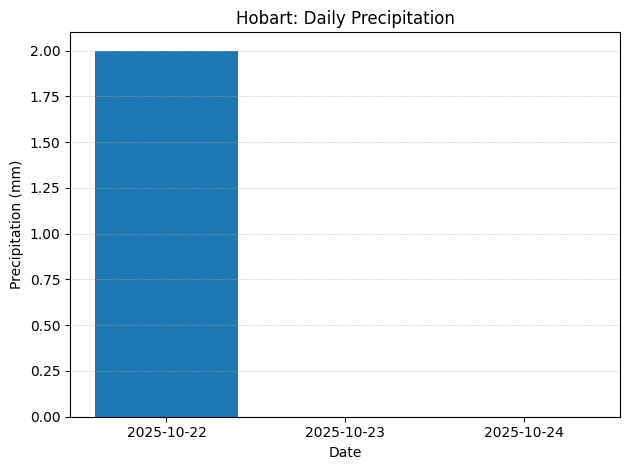

{'location': 'Hobart?', 'time': 'tomorrow', 'attribute': 'rain'}
 2025-10-23: 0–0°C


In [26]:
# 1) Quick fetch + table
d = get_weather_data("Hobart", 5)
display(forecast_to_df(d))

# 2) Visuals
create_temperature_visualisation(d)
create_precipitation_visualisation(d)

# 3) NLP
q = "Will it rain tomorrow in Hobart?"
print(parse_weather_question(q))
print(generate_weather_response(parse_weather_question(q), d))

# 4) Menu (run manually if you want interactive)
# main("console")

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.